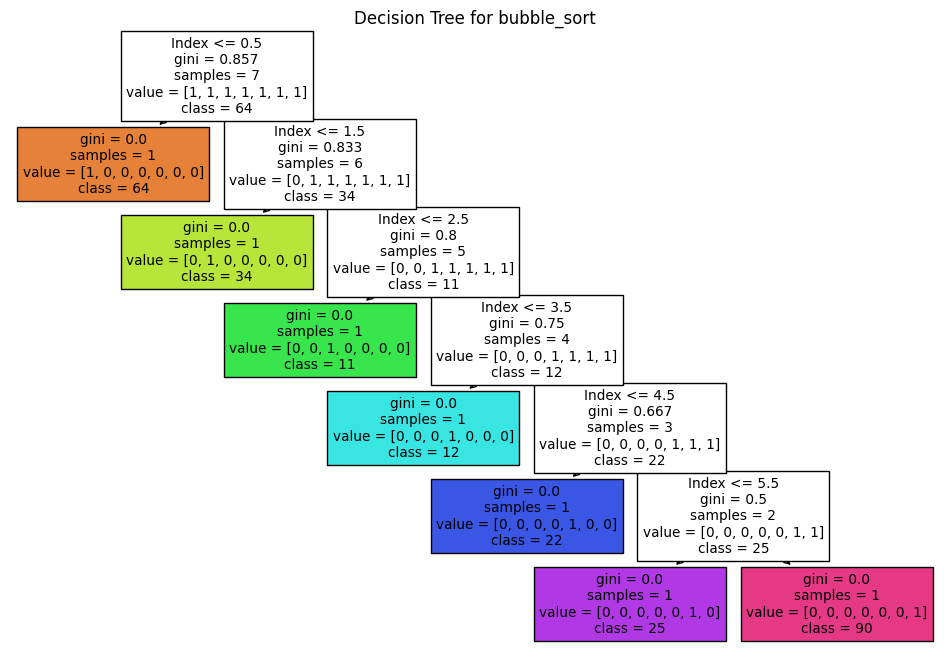

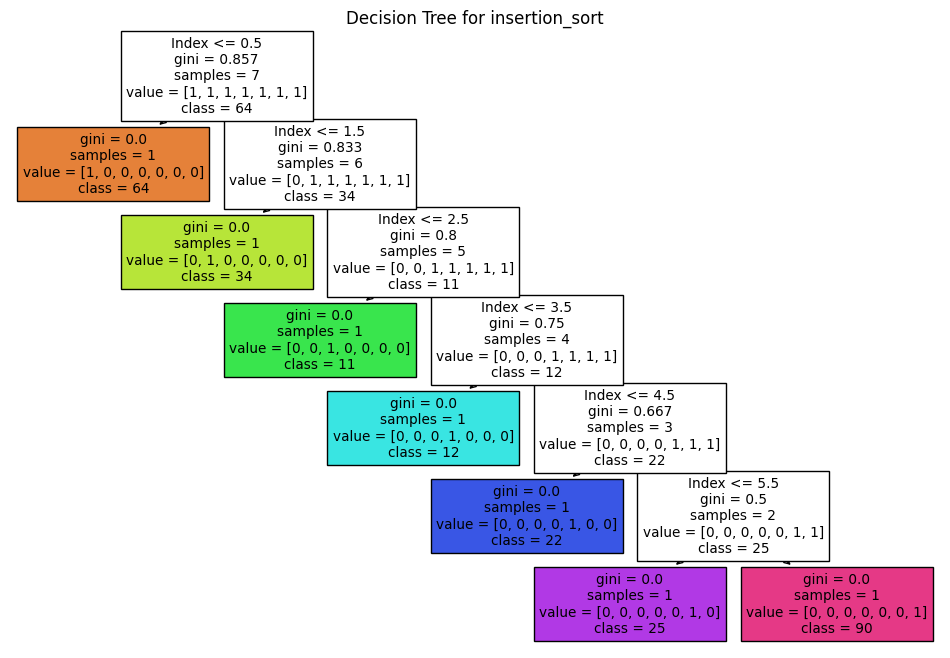

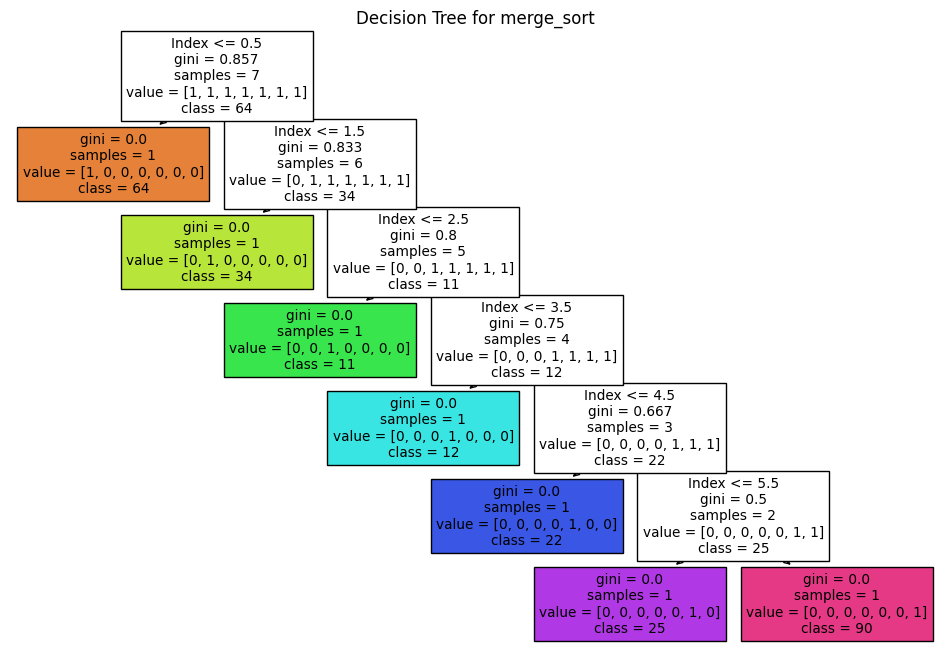

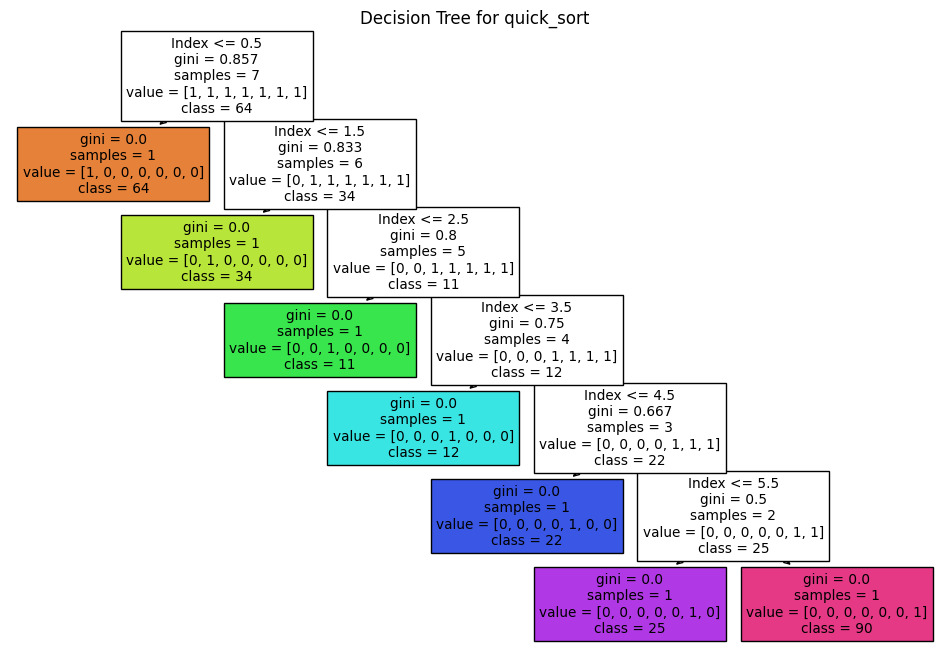

In [2]:
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

# Sorting Algorithms
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)

# Illustrating Sorting Algorithms with Decision Trees
def illustrate_sorting_with_decision_tree(sort_function, array):
    # Create a decision tree classifier
    clf = tree.DecisionTreeClassifier()

    # Generate data for decision tree visualization
    X = np.array([[i] for i in range(len(array))])  # Indices as features
    y = sort_function(array.copy())                # Sorted array as labels

    # Fit the decision tree on the data
    clf = clf.fit(X, y)

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    tree.plot_tree(clf, filled=True, feature_names=['Index'], class_names=[str(i) for i in set(y)])
    plt.title(f"Decision Tree for {sort_function.__name__}")
    plt.show()

# Example array to sort and visualize
example_array = [64, 34, 25, 12, 22, 11, 90]

# Visualize each sorting algorithm with a decision tree
illustrate_sorting_with_decision_tree(bubble_sort, example_array)
illustrate_sorting_with_decision_tree(insertion_sort, example_array)
illustrate_sorting_with_decision_tree(merge_sort, example_array)
illustrate_sorting_with_decision_tree(quick_sort, example_array)


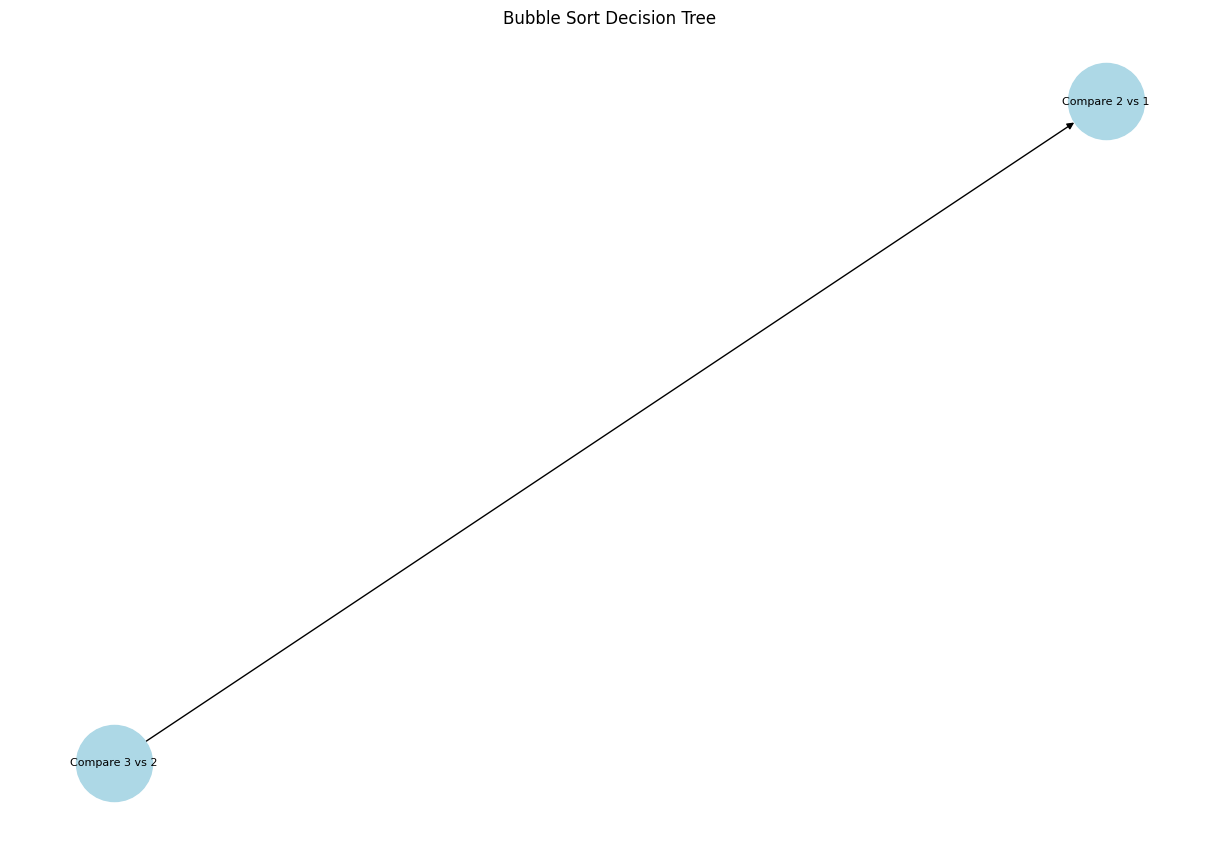

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations


def bubble_sort_decision_tree(elements):
    """
    Generate a decision tree for Bubble Sort by simulating its comparisons.
    Each node represents a comparison, and each leaf represents a sorted permutation.
    """
    n = len(elements)
    all_permutations = list(permutations(elements))  # Generate all possible permutations

    # Simulate Bubble Sort to record comparisons
    def simulate_bubble_sort(arr):
        steps = []
        arr = list(arr)
        for i in range(n - 1):
            for j in range(n - i - 1):
                steps.append((j, j + 1))  # Record the comparison
                if arr[j] > arr[j + 1]:  # Swap if necessary
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
        return steps

    comparisons = simulate_bubble_sort(elements)

    # Recursive function to build the decision tree
    def build_tree(perms, depth=0):
        if len(perms) == 1:
            return perms[0]  # Leaf node: only one permutation left

        if depth >= len(comparisons):  # No more comparisons to make
            return perms[0]

        i, j = comparisons[depth]
        left = [p for p in perms if p[i] <= p[j]]
        right = [p for p in perms if p[i] > p[j]]

        if left and right:  # Valid split
            left_tree = build_tree(left, depth + 1)
            right_tree = build_tree(right, depth + 1)
            return (i, j, left_tree, right_tree)

        return perms[0]  # Fallback: only one permutation remains

    root = build_tree(all_permutations)
    return root


def visualize_bubble_sort_tree(tree, elements):
    """
    Visualize the decision tree for Bubble Sort using NetworkX and Matplotlib.
    """
    G = nx.DiGraph()

    def add_edges(node, parent=None):
        if isinstance(node, tuple):  # Internal node: (i, j, left, right)
            if len(node) == 4:  # Ensure proper unpacking
                i, j, left, right = node
                label = f"Compare {elements[i]} vs {elements[j]}"
                G.add_node(label)
                if parent:
                    G.add_edge(parent, label)
                add_edges(left, label)
                add_edges(right, label)
        else:  # Leaf node: sorted permutation
            label = f"Sorted: {node}"
            G.add_node(label)
            if parent:
                G.add_edge(parent, label)

    add_edges(tree)

    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=8)
    plt.title("Bubble Sort Decision Tree")
    plt.show()


# Example usage
elements = [3, 2, 1]  # Small input size for visualization
tree = bubble_sort_decision_tree(elements)
visualize_bubble_sort_tree(tree, elements)


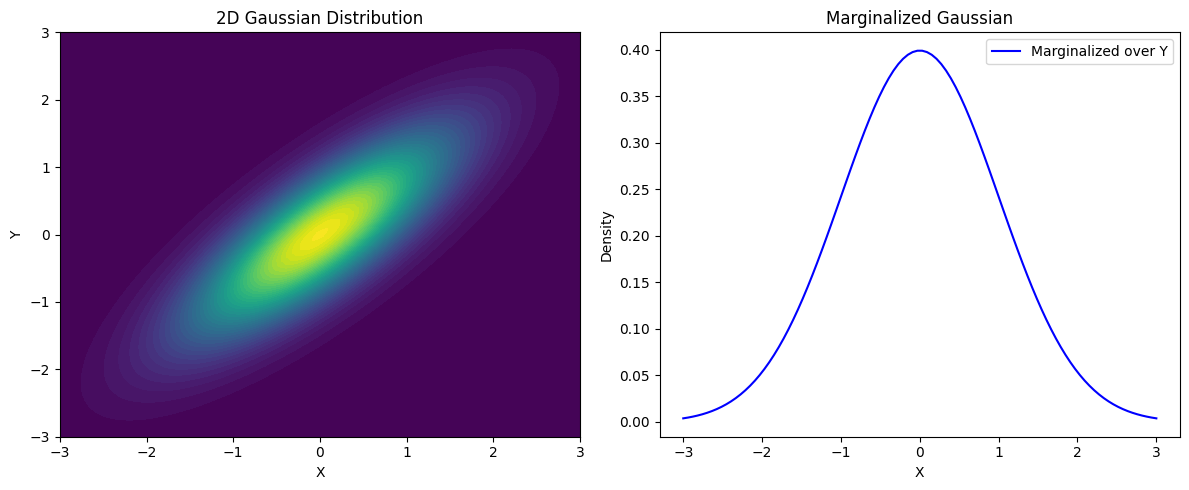

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean vector and covariance matrix for a 2D Gaussian
mean = [0, 0]  # Mean vector [mu_x, mu_y]
covariance = [[1, 0.8], [0.8, 1]]  # Covariance matrix

# Create a grid of points for visualization
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Define the multivariate Gaussian distribution
rv = multivariate_normal(mean, covariance)
Z = rv.pdf(pos)  # Joint probability density function

# Marginalize over Y by summing along the Y-axis
marginal_x = np.sum(Z, axis=0) * (y[1] - y[0])  # Approximate integration

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the 2D Gaussian as a contour plot
contour = ax[0].contourf(X, Y, Z, levels=50, cmap="viridis")
ax[0].set_title("2D Gaussian Distribution")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

# Plot the marginalized Gaussian over X
ax[1].plot(x, marginal_x, label="Marginalized over Y", color="blue")
ax[1].set_title("Marginalized Gaussian")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Density")
ax[1].legend()

plt.tight_layout()
plt.show()


Here is the fixed version of your code:



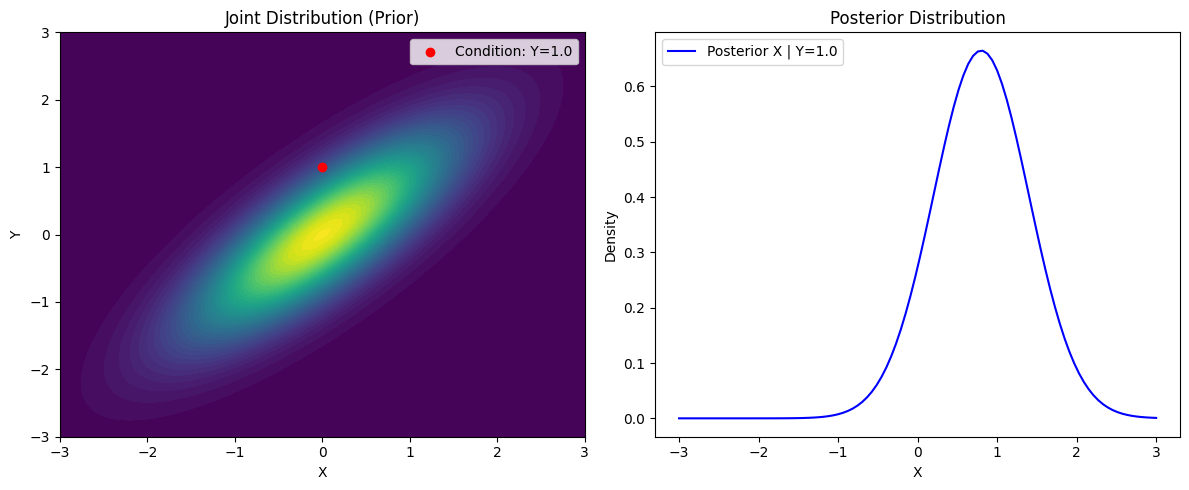

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters of the 2D Gaussian
mean = [0, 0]  # Mean vector [mu_x, mu_y]
covariance = [[1, 0.8], [0.8, 1]]  # Covariance matrix

# Create a grid for visualization
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Define the multivariate Gaussian distribution
rv = multivariate_normal(mean, covariance)

# Compute the joint PDF
Z = rv.pdf(pos)

# Conditioning: Compute posterior parameters for X | Y = y0
y0 = 1.0  # Conditioning on Y = y0
mu_x_given_y = mean[0] + (covariance[0][1] / covariance[1][1]) * (y0 - mean[1])
sigma_x_given_y = np.sqrt(covariance[0][0] * (1 - (covariance[0][1]**2 / (covariance[0][0] * covariance[1][1]))))

# Define the conditional distribution X | Y = y0
conditional_pdf = lambda x: multivariate_normal.pdf(x, mean=mu_x_given_y, cov=sigma_x_given_y**2)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the joint distribution as a contour plot
contour = ax[0].contourf(X, Y, Z, levels=50, cmap="viridis")
ax[0].set_title("Joint Distribution (Prior)")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].scatter(0, y0, color="red", label=f"Condition: Y={y0}")
ax[0].legend()

# Plot the conditional distribution X | Y=y0
x_vals = np.linspace(-3, 3, 100)
posterior_vals = conditional_pdf(x_vals)
ax[1].plot(x_vals, posterior_vals, label=f"Posterior X | Y={y0}", color="blue")
ax[1].set_title("Posterior Distribution")
ax[1].set_xlabel("X")
ax[1].set_ylabel("Density")
ax[1].legend()

plt.tight_layout()
plt.show()


Reduced Matrix (2D):
[[ 1.93354477  0.1642048 ]
 [ 1.47720534 -0.1862378 ]
 [ 1.75065618  0.72785394]
 [ 2.07550164 -0.63511499]
 [ 1.9536698  -0.64750752]
 [ 1.89644217  0.37782138]
 [ 1.79469328  0.67358863]
 [ 2.08331443 -0.68627474]
 [ 1.86333786 -0.24662623]
 [ 1.73183401  0.71049703]]
Cluster Labels:
[2 2 1 0 0 1 1 0 2 1]
Silhouette Score: 0.5682891737402512


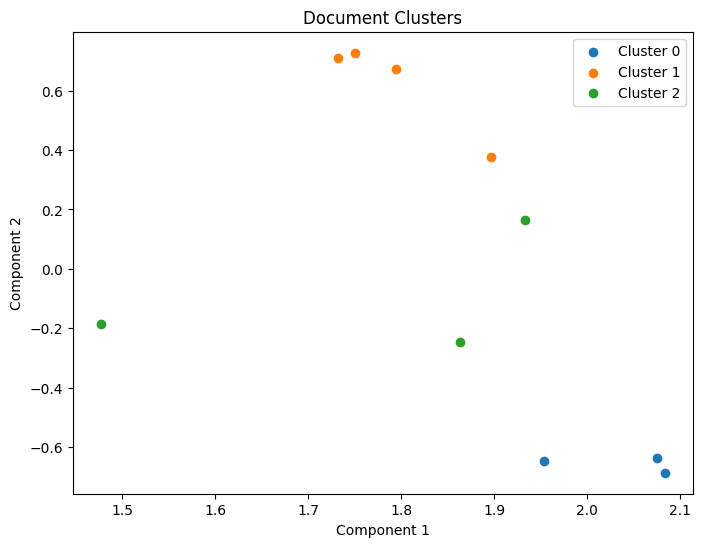

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate a sample matrix A (number of documents x number of words)
# Replace this with your actual matrix A
np.random.seed(42)  # For reproducibility
num_documents = 10  # Number of documents
num_words = 15      # Number of words (features)
A = np.random.rand(num_documents, num_words)  # Random matrix for demonstration

# Step 2: Perform dimensionality reduction using Truncated SVD
def perform_svd(matrix, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    reduced_matrix = svd.fit_transform(matrix)
    return reduced_matrix, svd

reduced_A, svd_model = perform_svd(A)
print("Reduced Matrix (2D):")
print(reduced_A)

# Step 3: Perform clustering using K-Means
def perform_kmeans(matrix, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(matrix)
    return labels, kmeans

labels, kmeans_model = perform_kmeans(reduced_A)
print("Cluster Labels:")
print(labels)

# Step 4: Evaluate clustering using silhouette score
def evaluate_clustering(matrix, labels):
    score = silhouette_score(matrix, labels)
    return score

silhouette = evaluate_clustering(reduced_A, labels)
print(f"Silhouette Score: {silhouette}")

# Step 5: Visualize the reduced matrix and clustering results
def visualize_clusters(matrix, labels):
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(labels):
        cluster_points = matrix[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")
    plt.title("Document Clusters")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()

visualize_clusters(reduced_A, labels)
